# Example 02: General Use of XGBoostCVClassifier
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/slickml/slick-ml/blob/master/examples/classification/example_02_XGBoostCVClassifier.ipynb)

### Google Colab Configuration

In [1]:
# !git clone https://github.com/slickml/slick-ml.git
# %cd slick-ml
# !pip install -r requirements.txt

### Local Environment Configuration

In [2]:
# Change path to project root
%cd ../..

/Users/atahmassebi/Desktop/AmirStuff/GitHub/slick-ml


### Import Python Libraries

In [3]:
%load_ext autoreload

# widen the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# change the path and loading class
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
%autoreload
from slickml.classification import XGBoostCVClassifier

-----
# XGBoostCVClassifier Docstring

In [5]:
help(XGBoostCVClassifier)

Help on class XGBoostCVClassifier in module slickml.classification:

class XGBoostCVClassifier(XGBoostClassifier)
 |  XGBoostCVClassifier(num_boost_round=None, n_splits=None, metrics=None, early_stopping_rounds=None, random_state=None, stratified=True, shuffle=True, sparse_matrix=False, scale_mean=False, scale_std=False, importance_type=None, params=None, callbacks=False, verbose=True)
 |  
 |  XGBoost CV Classifier.
 |  This is subclass of XGBoostClassifier to run xgboost.cv()
 |  model with n-folds cross-validation and train model based on
 |  the best number of boosting round to avoid over-fitting. This
 |  function is pretty useful when feature selection is done and you
 |  want to train a model on the whole data and test on a separate
 |  validation set. In this case, cross-validation part on the train
 |  set decrease the possibility of over-fitting.
 |  run xgboost.train(). Main reference is XGBoost Python API:
 |  (https://xgboost.readthedocs.io/en/latest/python/python_api.html

## Example

In [6]:
# loading data
df = pd.read_csv("data/clf_data.csv")
df.head()

,F1,F2,F3,F4,F5,F6,CLASS
0,5.7,4.7,3.7,58.0,249.30,456.47,0
1,7.7,6.6,4.1,20.0,260.92,443.43,1
2,6.2,4.3,4.6,59.0,255.63,478.96,1
3,5.7,4.4,3.8,49.0,195.28,381.94,0
4,9.1,4.7,4.6,17.0,259.55,395.67,1


In [7]:
# define X, y
y = df.CLASS.values
X = df.drop(["CLASS"], axis=1)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    stratify=y,
                                                    random_state=1367)

In [9]:
# setup feature selector object
params={"eval_metric" : "auc",
        "learning_rate" : 0.05,
        "max_depth": 2,
        "min_child_weight" : 1,
        "gamma" : 0.0}

clf = XGBoostCVClassifier(num_boost_round=500,
                          n_splits=4,
                          metrics=("logloss"),
                          params=params)
clf.fit(X_train, y_train)

*-* Best Boosting Round = 184 -*- 4-Folds CV LOGLOSS: Train = 0.234 +/- 0.007 -*- Test = 0.317 +/- 0.024 *-*


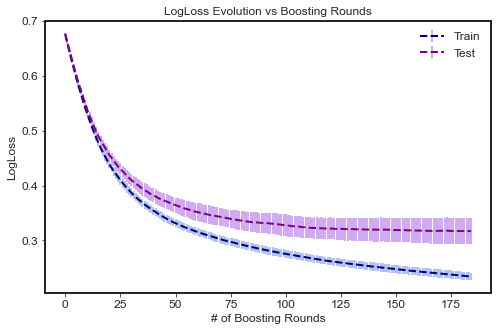

In [10]:
clf.plot_cv_results()

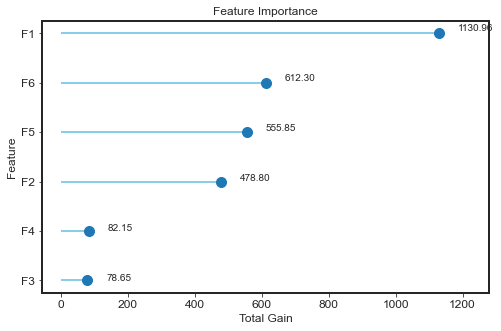

In [11]:
clf.plot_feature_importance()

In [12]:
# predic proba (or clf.y_pred_proba_)
y_pred_proba = clf.predict_proba(X_test, y_test)
y_pred_proba[:10]

array([0.64171946, 0.61684114, 0.99003017, 0.91298306, 0.8299428 ,
       0.7633004 , 0.6021808 , 0.90217304, 0.97642833, 0.99487996],
      dtype=float32)

In [13]:
# (or clf.y_pred_proba_)
clf.y_pred_proba_[:10]

array([0.64171946, 0.61684114, 0.99003017, 0.91298306, 0.8299428 ,
       0.7633004 , 0.6021808 , 0.90217304, 0.97642833, 0.99487996],
      dtype=float32)

In [14]:
# pred class (or clf.y_pred_)
# threshold can be set 
y_pred = clf.predict(X_test, threshold=0.67)
y_pred[:10]

[0, 0, 1, 1, 1, 1, 0, 1, 1, 1]

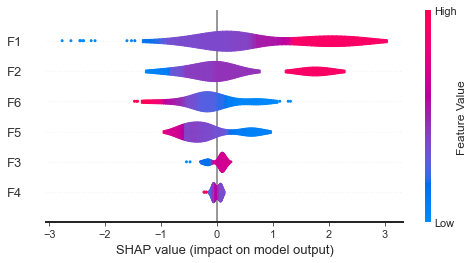

In [15]:
# shap summary plot violin on test data
clf.plot_shap_summary(plot_type="violin", validation=True)

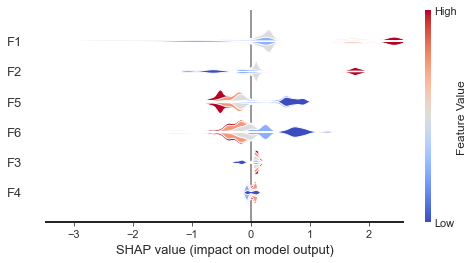

In [16]:
# shap summary plot layered violin plot on train data
clf.plot_shap_summary(plot_type="layered_violin", validation=False, layered_violin_max_num_bins=5)

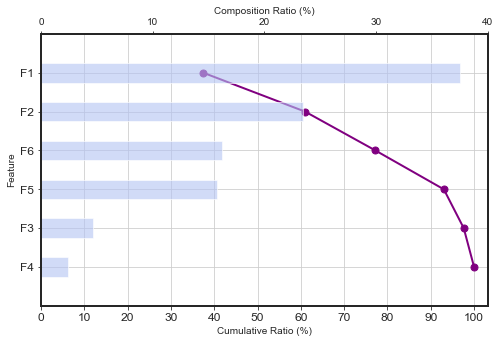

In [17]:
# shap waterfall plot
clf.plot_shap_waterfall()

In [18]:
clf.shap_values_test_[:10]

array([[-1.2005614 , -0.6349206 ,  0.19855826,  0.03281969,  0.51452583,
         0.07554262],
       [ 0.23941053, -0.60504323, -0.28683293, -0.03096407, -0.22099388,
        -0.216284  ],
       [ 1.8264248 ,  1.6714604 ,  0.0565909 ,  0.01923166, -0.41215527,
        -0.16024815],
       [ 1.7477709 ,  0.06145534,  0.0593722 ,  0.07809728, -0.5916128 ,
        -0.6013375 ],
       [-0.08796261, -1.09392   , -0.27112603, -0.09717903,  0.575242  ,
         0.96329737],
       [ 0.28039014, -0.10400181, -0.17911063, -0.01561601, -0.21933109,
        -0.18834132],
       [ 0.19935322, -1.0103196 ,  0.12393563, -0.03731423, -0.23873761,
        -0.21922778],
       [ 0.33002245,  0.6182194 ,  0.06548949, -0.0102291 , -0.22334066,
        -0.15542485],
       [ 0.30563477,  1.6667733 ,  0.12042817, -0.04798719,  0.06836368,
         0.01377192],
       [ 2.404328  ,  1.7473522 ,  0.1353038 ,  0.09186842, -0.49653548,
        -0.20973206]], dtype=float32)

In [19]:
clf.shap_values_train_[:10]

array([[ 1.665816  ,  1.8591485 , -0.08352551, -0.10808454, -0.54267806,
        -0.39803675],
       [ 0.26592866, -0.19753721,  0.07379389,  0.05649821, -0.22076738,
        -0.37988985],
       [ 0.13361195, -1.1272837 , -0.2919951 ,  0.03111111,  0.04993655,
         0.2176648 ],
       [ 2.3987846 ,  1.6307589 ,  0.06135088, -0.04600068, -0.11875799,
        -0.06999492],
       [ 2.3355286 ,  0.08118344,  0.06045018,  0.08600937, -0.5318051 ,
        -1.2756107 ],
       [ 1.7009639 ,  1.8591485 , -0.08352551, -0.03712523, -0.54267806,
        -0.39803675],
       [ 1.7785164 ,  0.590538  ,  0.06134036, -0.04835069, -0.26444903,
        -0.14923693],
       [ 0.2598786 ,  0.02775853,  0.08566007, -0.10532834, -0.20046954,
         0.90344745],
       [ 0.13745104, -0.1553896 ,  0.06788931, -0.00544032,  0.56880987,
         0.6611805 ],
       [ 0.16715604, -1.1237895 ,  0.12393563,  0.02946925, -0.2324549 ,
        -0.4222907 ]], dtype=float32)

In [20]:
# cv_results (or clf.cv_results_)
cvr = clf.get_cv_results()
cvr.tail()

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
180,0.235789,0.007246,0.317483,0.023996
181,0.235385,0.007169,0.317239,0.023804
182,0.235012,0.007174,0.317179,0.023877
183,0.234660,0.007154,0.317133,0.023629
184,0.234274,0.007050,0.317041,0.023677


In [21]:
# feature importance (or clf.feature_importance_)
clf.get_feature_importance()

,feature,total_gain
0,F1,1130.963486
1,F6,612.299638
2,F5,555.854783
3,F2,478.795449
4,F4,82.152632
5,F3,78.653343


In [22]:
clf.model_